In [22]:
using ConvolutionalFactorizations
using Random
using LinearAlgebra
using Plots

include("../datasets/toy.jl")

generate_toy_data (generic function with 1 method)

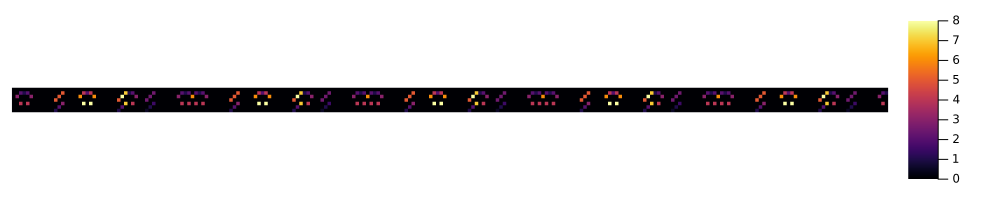

In [23]:
X, W, H = generate_toy_data();
heatmap(X, aspect_ratio=:equal, size=(1000,200), showaxis=false, ticks=false)

In [60]:
# Let's fit this data using a masked loss
mask = ones(size(X))
mask[:, 50:100] .= 0
loss = MaskedLoss(SquareLoss(), mask)

model = ConvolutionalFactorization(L=5, K=2, loss=loss)
(Ŵ,Ĥ), cache, report = fit(model, X);
est = tensor_conv(Ŵ,Ĥ)

layout = @layout [a; b; c]
p1 = heatmap(est, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="Reconstruction")
p2 = heatmap(mask, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="Mask")
p3 = heatmap(X, aspect_ratio=:equal, size=(1000,100), showaxis=false, ticks=false, colorbar=false,
    title="True")
plot(p3, p2, p1, layout=layout, size=(1000,300))
savefig("masked_loss_exampl.png")

In [37]:
@show size(mask)

size(mask) = (7, 250)


(7, 250)